Dataset Loaded Successfully:
   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  16                      81
2                  17                       6
3                  18                      77
4                  19                      40


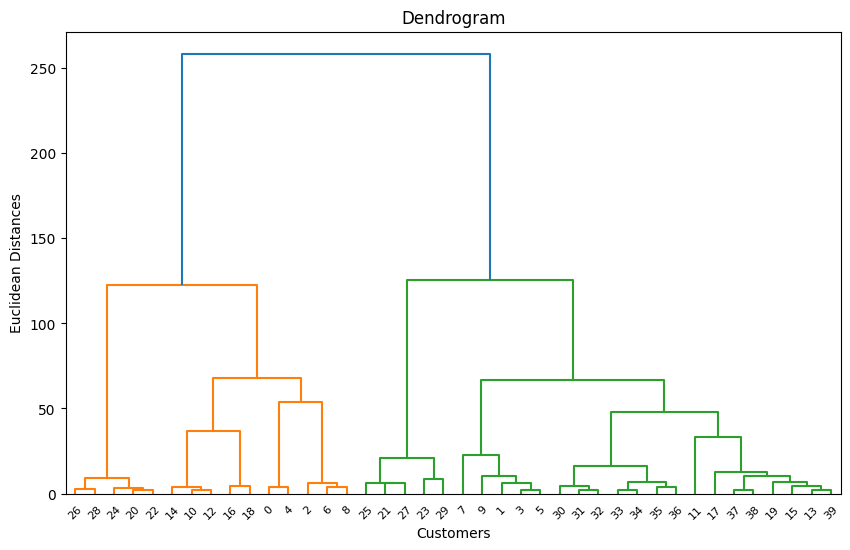

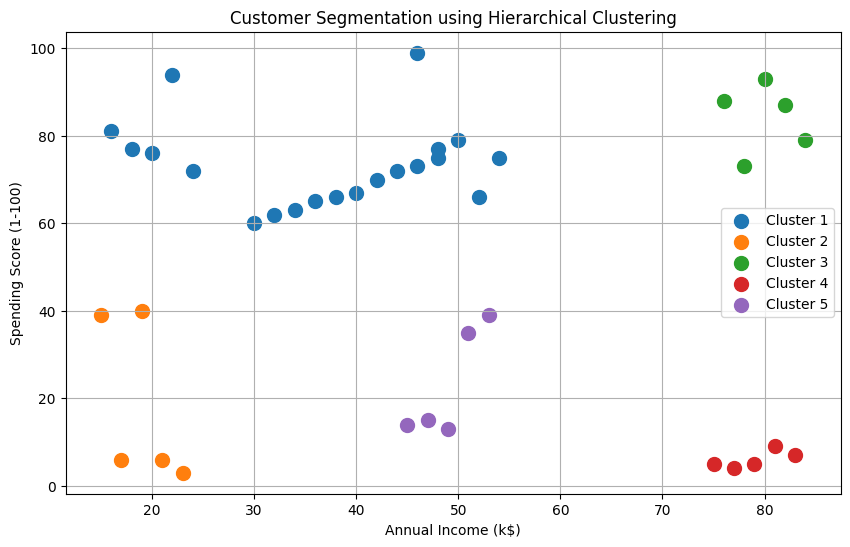

In [1]:
# =============================================================
# Ex No: 12 – Hierarchical Clustering
# Mall Customer Segmentation (Income vs Spending Score)
# Dataset INCLUDED — No CSV upload needed
# =============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# -------------------------------------------------------------
# 1. Create Sample Dataset (Annual Income & Spending Score)
# -------------------------------------------------------------

data = {
    'Annual Income (k$)': [15,16,17,18,19,20,21,22,23,24,
                           45,46,47,48,49,50,51,52,53,54,
                           75,76,77,78,79,80,81,82,83,84,
                           30,32,34,36,38,40,42,44,46,48],
    'Spending Score (1-100)': [39,81,6,77,40,76,6,94,3,72,
                               14,99,15,77,13,79,35,66,39,75,
                               5,88,4,73,5,93,9,87,7,79,
                               60,62,63,65,66,67,70,72,73,75]
}

df = pd.DataFrame(data)
print("Dataset Loaded Successfully:")
print(df.head())

# -------------------------------------------------------------
# 2. Feature Selection
# -------------------------------------------------------------
X = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# -------------------------------------------------------------
# 3. Dendrogram to Find Optimal Clusters
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
plt.show()

# -------------------------------------------------------------
# 4. Apply Hierarchical Clustering (Agglomerative)
# -------------------------------------------------------------
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# -------------------------------------------------------------
# 5. Visualize Clusters
# -------------------------------------------------------------
plt.figure(figsize=(10, 6))

plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, label='Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s=100, label='Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s=100, label='Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s=100, label='Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s=100, label='Cluster 5')

plt.title("Customer Segmentation using Hierarchical Clustering")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.grid(True)
plt.show()
